### IMDB Movie dataset EDA amd movie recommendation based on Genre, language and region.

In [1]:
# here's several helpful packages to load

# Install vaex.
#!pip install vaex

import warnings
warnings.simplefilter('ignore')
import gc

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

import mxnet as mx

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

#import vaex

# Data Analysis and Visualization
# import pandas_profiling

## command to see the memory usage
# df.info(memory_usage='deep')

%matplotlib inline
plt.style.use('seaborn')
warnings.filterwarnings('ignore')

In [2]:
BASE_URL = "https://datasets.imdbws.com/"
filenames = [
'title.basics.tsv.gz', 
'title.ratings.tsv.gz', 
'title.crew.tsv.gz', 
'title.akas.tsv.gz', 
'title.episode.tsv.gz', 
'title.principals.tsv.gz', 
'name.basics.tsv.gz'] 

## Lets Analyze each file one by one

In [3]:
#df_titleBasics = pd.read_csv(''.join([BASE_URL, filenames[0]]), sep='\t', low_memory=False)
#df_ratings = pd.read_csv(''.join([BASE_URL, filenames[1]]), sep='\t', low_memory=False)
#df_akas = pd.read_csv(''.join([BASE_URL, filenames[3]]), sep='\t', low_memory=False)
#df_crew = pd.read_csv(''.join([BASE_URL, filenames[2]]), sep='\t', low_memory=False) - Not utilizing in this analysis
#df_episods = pd.read_csv(''.join([BASE_URL, filenames[4]]), sep='\t', low_memory=False) - Not utilizing in this analysis
#df_principals = pd.read_csv(''.join([BASE_URL, filenames[5]]), sep='\t', low_memory=False) - Not utilizing in this analysis
#df_name_basics = pd.read_csv(''.join([BASE_URL, filenames[6]]), sep='\t', low_memory=False) - Not utilizing in this analysis

In [4]:
#print(df_titleBasics.shape) # (7656314, 9)
#print(df_akas.shape) # (25290774, 8)
#print(df_ratings.shape) # (1125873, 3)
#print(df_crew.shape) # (7656314, 3)
#print(df_episods.shape) # (5556745, 4)
#print(df_principals.shape) # (43272187, 6)
#print(df_name_basics.shape) # (10747436, 6)

### Here we will analyze the titles Basic file

In [5]:
df_titleBasics = pd.read_csv(''.join([BASE_URL, filenames[0]]), sep='\t', low_memory=False)

In [6]:
df_titleBasics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [7]:
df_titleBasics = df_titleBasics[~df_titleBasics.genres.isin(['\\N']) & df_titleBasics.titleType.isin(['movie']) & (df_titleBasics['startYear']!='\\N')]

In [8]:
#  convert the year value (string) to integer for easy scaling and comparison
df_titleBasics['startYear'] = df_titleBasics['startYear'].astype(int)

In [9]:
## Used this line to check if there are any duplicated rows based on tconst
temp = df_titleBasics[df_titleBasics.duplicated('tconst', keep=False)]
temp.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres


In [10]:
df_titleBasics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
610,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama
625,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama
668,tt0000675,movie,Don Quijote,Don Quijote,0,1908,\N,\N,Drama
672,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,\N,120,"Adventure,Fantasy"


In [11]:
# let's convert the csv column to a pandas list object in a new column
df_titleBasics['genres_list'] = df_titleBasics.genres.str.split(',').tolist()

In [12]:
df_titleBasics = df_titleBasics[['tconst','primaryTitle', 'startYear', 'genres_list']]

In [13]:
# get the one hot encoded values for genre. 
# (this table is relatively sparse)
genres_one_hot_encoded = df_titleBasics.genres_list.str.join('|').str.get_dummies().add_prefix('genre_')
genres_one_hot_encoded.head()

,genre_Action,genre_Adult,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,...,genre_News,genre_Reality-TV,genre_Romance,genre_Sci-Fi,genre_Short,genre_Sport,genre_Talk-Show,genre_Thriller,genre_War,genre_Western
570,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
610,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
625,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
668,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
672,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# let's add these new columns to the original full data
df_titleBasics = pd.concat([df_titleBasics, genres_one_hot_encoded], axis=1, sort=False)

In [15]:
# now we can drop the genres_list columns, and the one-hot-encoded columns for null values
df_titleBasics.drop(['genres_list'],axis=1,inplace=True)

In [16]:
df_titleBasics.head()

,tconst,primaryTitle,startYear,genre_Action,genre_Adult,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,...,genre_News,genre_Reality-TV,genre_Romance,genre_Sci-Fi,genre_Short,genre_Sport,genre_Talk-Show,genre_Thriller,genre_War,genre_Western
570,tt0000574,The Story of the Kelly Gang,1906,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
610,tt0000615,Robbery Under Arms,1907,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
625,tt0000630,Hamlet,1908,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
668,tt0000675,Don Quijote,1908,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
672,tt0000679,The Fairylogue and Radio-Plays,1908,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df_titleBasics.shape

(434010, 31)

### Here we will understand the ratings file

In [18]:
df_ratings = pd.read_csv(''.join([BASE_URL, filenames[1]]), sep='\t', low_memory=False)

In [19]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131048 entries, 0 to 1131047
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1131048 non-null  object 
 1   averageRating  1131048 non-null  float64
 2   numVotes       1131048 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 25.9+ MB


In [20]:
df_ratings.shape

(1131048, 3)

## finding outliers in ratings data, it will be handled later

Text(0, 0.5, 'average rating of movie')

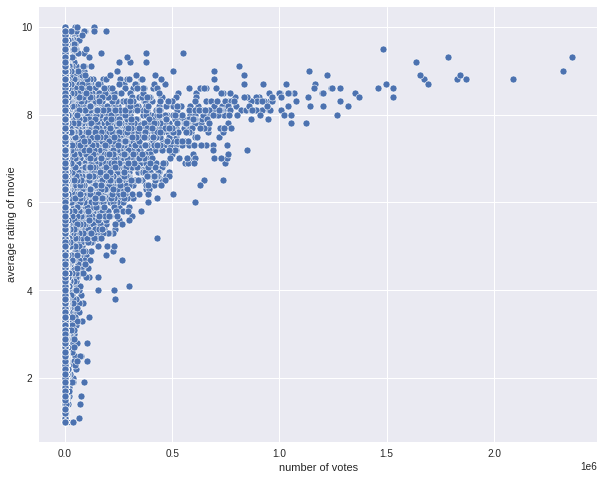

In [21]:
# and check out if there's a relationship between number of votes and the average rating
plt.figure(figsize = (10,8))
sns.scatterplot(x = df_ratings['numVotes'], y = df_ratings['averageRating'])
plt.xlabel('number of votes')
plt.ylabel('average rating of movie')

In [22]:
Q1 = df_ratings.quantile(0.25)
Q3 = df_ratings.quantile(0.75)
IQR = (Q3 - Q1)
print(IQR)

averageRating     1.8
numVotes         70.0
dtype: float64


In [23]:
#Removing outliers
df_ratings = df_ratings[~((df_ratings < (Q1 - 1.5 * IQR)) |(df_ratings > (Q3 + 1.5 * IQR))).any(axis=1)]
df_ratings.shape

(934388, 3)

### As everything looks good, we are merging these two
* df_ratings and df_titleBasics row counts are same, we can easily merge them

In [24]:
data1 = df_titleBasics.merge(df_ratings, on ="tconst", validate='1:1')
# after this merge, found some additional records. meaning merge didn't happen properly or it was compund merge, which caused additinal records. Need to correct it later. not even sure whats wrong here.
print(data1.shape) # (250908, 33) #

(168895, 33)


In [25]:
# deleting dataframes that are not used any more
del df_titleBasics
del df_ratings
del temp
gc.collect()

222

### Here we will analyze the akas file

### Since I am only aware of "Indian" and "American" movies. I will be filtering records for that in the akas file. Then we are going to merge these. This will lower down our record count and make it easy for our prediction.
* Expecting around 3 million records only

In [26]:
df_akas = pd.read_csv(''.join([BASE_URL, filenames[3]]), sep='\t', low_memory=False)

In [27]:
df_akas = df_akas[df_akas.language.isin(['hi','en']) & df_akas.region.isin(['US','IN'])][['titleId', 'region', 'language']]

In [28]:
df_akas.head()

,titleId,region,language
781,tt0000211,US,en
1312,tt0000417,IN,en
2727,tt0000969,US,en
6225,tt0002773,IN,en
7256,tt0003311,IN,en


In [29]:
# get the one hot encoded values for language. 
language_one_hot_encoded = pd.get_dummies(df_akas.language, prefix='language')
language_one_hot_encoded.head()

,language_en,language_hi
781,1,0
1312,1,0
2727,1,0
6225,1,0
7256,1,0


In [30]:
# get the one hot encoded values for region. 
region_one_hot_encoded = pd.get_dummies(df_akas.region, prefix='region')
region_one_hot_encoded.head()

,region_IN,region_US
781,0,1
1312,1,0
2727,0,1
6225,1,0
7256,1,0


In [31]:
# let's add these new columns to the original full data
df_akas = pd.concat([df_akas, language_one_hot_encoded, region_one_hot_encoded], axis=1, sort=False)

In [32]:
df_akas.head()

,titleId,region,language,language_en,language_hi,region_IN,region_US
781,tt0000211,US,en,1,0,0,1
1312,tt0000417,IN,en,1,0,1,0
2727,tt0000969,US,en,1,0,0,1
6225,tt0002773,IN,en,1,0,1,0
7256,tt0003311,IN,en,1,0,1,0


In [33]:
# now we can drop the descriptive value columns, and the one-hot-encoded columns for null values
df_akas.drop(['region','language'],axis=1,inplace=True)

In [34]:
df_akas.head()

,titleId,language_en,language_hi,region_IN,region_US
781,tt0000211,1,0,0,1
1312,tt0000417,1,0,1,0
2727,tt0000969,1,0,0,1
6225,tt0002773,1,0,1,0
7256,tt0003311,1,0,1,0


In [35]:
df_akas.shape

(3003349, 5)

In [36]:
# the titles get duplicated if it's moved language/region, etc. Let's only consider original titles to remove bias
df_akas = df_akas.drop_duplicates(subset=['titleId'])

In [37]:
df_akas.shape

(2997345, 5)

### As everything looks good, we are merging akas and data1
* data1 and df_akas row counts are same, we can easily merge them

In [38]:
final_data = data1.merge(df_akas, left_on ='tconst', right_on='titleId', how='inner', validate='1:1')

In [39]:
final_data.shape

(6484, 38)

In [40]:
# deleting dataframes that are not used any more
del df_akas
del data1
gc.collect()

80

In [41]:
final_data.head()

,tconst,primaryTitle,startYear,genre_Action,genre_Adult,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,...,genre_Thriller,genre_War,genre_Western,averageRating,numVotes,titleId,language_en,language_hi,region_IN,region_US
0,tt0003442,Tess of the D'Urbervilles,1913,0,0,0,0,0,0,0,...,0,0,0,5.9,9,tt0003442,1,0,1,0
1,tt0008305,Les Misérables,1917,0,0,0,0,0,0,0,...,0,0,0,6.2,16,tt0008305,1,0,0,1
2,tt0010386,The Lost Battalion,1919,0,0,0,0,0,0,0,...,0,1,0,6.7,93,tt0010386,1,0,1,0
3,tt0010994,Billions,1920,0,0,0,0,0,1,0,...,0,0,0,6.2,8,tt0010994,1,0,1,0
4,tt0016051,The Lucky Devil,1925,1,0,0,0,0,1,0,...,0,0,0,6.7,20,tt0016051,1,0,1,0


## Now, lets handle outliers in our data
* How to detect outliers in data:-
    * data visualization is a great way to do that

In [42]:
# We can now set the ‘titleid and title’ 
#   as the index and the rest of the numerical 
#   features become the attributes of each unique title.
final_data.index=final_data['titleId'] + " " + final_data['primaryTitle']
final_data.drop(['titleId','primaryTitle', 'tconst'],axis=1,inplace=True)

In [43]:
final_data.head()

,startYear,genre_Action,genre_Adult,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,...,genre_Talk-Show,genre_Thriller,genre_War,genre_Western,averageRating,numVotes,language_en,language_hi,region_IN,region_US
tt0003442 Tess of the D'Urbervilles,1913,0,0,0,0,0,0,0,0,1,...,0,0,0,0,5.9,9,1,0,1,0
tt0008305 Les Misérables,1917,0,0,0,0,0,0,0,0,1,...,0,0,0,0,6.2,16,1,0,0,1
tt0010386 The Lost Battalion,1919,0,0,0,0,0,0,0,0,1,...,0,0,1,0,6.7,93,1,0,1,0
tt0010994 Billions,1920,0,0,0,0,0,1,0,0,0,...,0,0,0,0,6.2,8,1,0,1,0
tt0016051 The Lucky Devil,1925,1,0,0,0,0,1,0,0,1,...,0,0,0,0,6.7,20,1,0,1,0


## Feature Engineering

In [44]:
# Data Scaling – We need to standardize the scaling of the numerical columns 
#   in order to use any distance based analytical methods so that we can 
#   compare the relative distances between different feature columns. We can 
#   use minmaxscaler to transform the numerical columns so that they also 
#   fall between 0 and 1.
scaler=MinMaxScaler()
df_titles_scaled=pd.DataFrame(scaler.fit_transform(final_data))
df_titles_scaled.columns=final_data.columns
df_titles_scaled.index=final_data.index

In [45]:
df_titles_scaled.describe()

,startYear,genre_Action,genre_Adult,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,...,genre_Talk-Show,genre_Thriller,genre_War,genre_Western,averageRating,numVotes,language_en,language_hi,region_IN,region_US
count,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,...,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000
mean,0.781095,0.177822,0.000617,0.048427,0.013263,0.017582,0.195404,0.083745,0.065238,0.558606,...,0.000154,0.107341,0.008945,0.007557,0.433213,0.287860,0.863664,0.136336,0.969772,0.030228
std,0.203930,0.382393,0.024832,0.214683,0.114409,0.131435,0.396542,0.277026,0.246964,0.496592,...,0.012419,0.309570,0.094162,0.086609,0.193169,0.271650,0.343171,0.343171,0.171228,0.171228
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.638889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.296875,0.061453,1.000000,0.000000,1.000000,0.000000
50%,0.851852,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.437500,0.189944,1.000000,0.000000,1.000000,0.000000
75%,0.962963,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.562500,0.458101,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
df_titles_scaled.shape

(6484, 35)

In [47]:
df_titles_scaled.head()

,startYear,genre_Action,genre_Adult,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,...,genre_Talk-Show,genre_Thriller,genre_War,genre_Western,averageRating,numVotes,language_en,language_hi,region_IN,region_US
tt0003442 Tess of the D'Urbervilles,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.390625,0.022346,1.0,0.0,1.0,0.0
tt0008305 Les Misérables,0.037037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.437500,0.061453,1.0,0.0,0.0,1.0
tt0010386 The Lost Battalion,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.515625,0.491620,1.0,0.0,1.0,0.0
tt0010994 Billions,0.064815,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.437500,0.016760,1.0,0.0,1.0,0.0
tt0016051 The Lucky Devil,0.111111,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.515625,0.083799,1.0,0.0,1.0,0.0


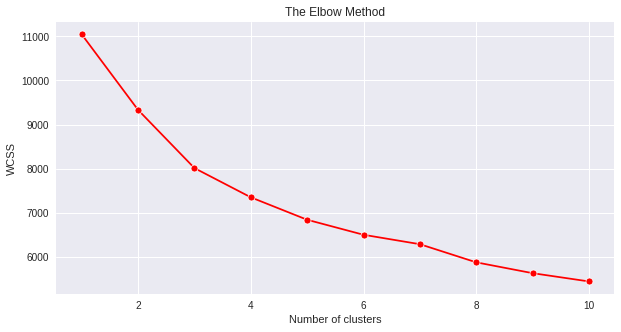

In [48]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_titles_scaled)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [49]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 10, init = 'k-means++', random_state = 42)
cluster_labels = kmeans.fit_predict(df_titles_scaled)

In [50]:
cluster_labels.size

6484

In [51]:
pd.DataFrame(cluster_labels)[0].value_counts()

5    1630
2     884
3     691
8     632
6     614
9     545
1     394
7     390
4     384
0     320
Name: 0, dtype: int64

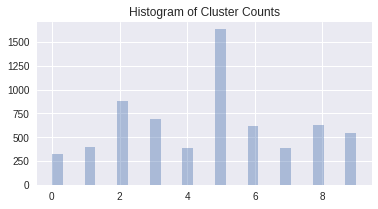

In [52]:
ax=plt.subplots(figsize=(6,3))
ax=sns.distplot(cluster_labels, kde=False)
title="Histogram of Cluster Counts"
ax.set_title(title, fontsize=12)
plt.show()

In [62]:
prediction_df = df_titles_scaled
prediction_df['cluster_labels']=list(map(int, cluster_labels))
prediction_df.head()

,startYear,genre_Action,genre_Adult,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,...,genre_Thriller,genre_War,genre_Western,averageRating,numVotes,language_en,language_hi,region_IN,region_US,cluster_labels
tt0003442 Tess of the D'Urbervilles,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.390625,0.022346,1.0,0.0,1.0,0.0,7
tt0008305 Les Misérables,0.037037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.437500,0.061453,1.0,0.0,0.0,1.0,5
tt0010386 The Lost Battalion,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.515625,0.491620,1.0,0.0,1.0,0.0,5
tt0010994 Billions,0.064815,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.437500,0.016760,1.0,0.0,1.0,0.0,3
tt0016051 The Lucky Devil,0.111111,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.515625,0.083799,1.0,0.0,1.0,0.0,4


* As you can see we have labeled each row with identified cluster value
* we can use this information to recommend movies that are in same cluster
* This process of recommendation would be sub-categorised as recommendation based on genre, language and region. Because these are the factors that we used in our model.

### Below is an example, how same genre of indian movies are coming in this one cluster. As you can see all of these are drama genre movies.

In [64]:
cluster1=prediction_df[prediction_df['cluster_labels']==0]
cluster1.head(10)

,startYear,genre_Action,genre_Adult,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,...,genre_Thriller,genre_War,genre_Western,averageRating,numVotes,language_en,language_hi,region_IN,region_US,cluster_labels
tt0039848 The Son of Rusty,0.314815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.421875,0.553073,1.0,0.0,1.0,0.0,0
tt0042380 Dastan,0.342593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.531250,0.307263,1.0,0.0,1.0,0.0,0
tt0043549 Fodboldpræsten,0.351852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.453125,0.324022,1.0,0.0,1.0,0.0,0
tt0047271 Naukari,0.388889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.656250,0.480447,1.0,0.0,1.0,0.0,0
tt0052051 Parvarish,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.531250,0.357542,1.0,0.0,1.0,0.0,0
tt0052960 Kanhaiya,0.425926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.515625,0.223464,1.0,0.0,1.0,0.0,0
tt0053928 Hum Hindustani,0.435185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.578125,0.268156,1.0,0.0,1.0,0.0,0
tt0055444 Shola Aur Shabnam,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.625000,0.229050,1.0,0.0,1.0,0.0,0
tt0056394 Rungoli,0.453704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.484375,0.044693,1.0,0.0,1.0,0.0,0
tt0057884 Beti Bete,0.472222,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.531250,0.139665,1.0,0.0,1.0,0.0,0


Future Work:
* Need to apply more advance ML techniques, like PCA
* implement various other ML modeling
    * EM clustering
    * DBSCAN (density based clustering algorithm)
    * Hierarchical clustering

## PCA: Application in Machine Learning
Principal Component Analysis (PCA) is an unsupervised, non-parametric statistical technique primarily used for dimensionality reduction in machine learning.
High dimensionality means that the dataset has a large number of features, that can lead to model overfitting.

In [141]:
## Initially we are going to apply it on all columns and analyze the result
#pca = PCA(n_components=35)
#principalComponents = pca.fit_transform(df_titles_scaled)

In [142]:
'''
# original_num_df the original numeric dataframe
# pca is the model
def create_importance_dataframe(pca, original_num_df):

    # Change pcs components ndarray to a dataframe
    importance_df  = pd.DataFrame(pca)

    # Assign columns
    importance_df.columns  = original_num_df.columns

    # Change to absolute values
    importance_df =importance_df.apply(np.abs)

    # Transpose
    importance_df=importance_df.transpose()

    # Change column names again

    ## First get number of pcs
    num_pcs = importance_df.shape[1]

    ## Generate the new column names
    new_columns = [f'PC{i}' for i in range(1, num_pcs + 1)]

    ## Now rename
    importance_df.columns  = new_columns

    # Return importance df
    return importance_df

# Call function to create importance df
importance_df  = create_importance_dataframe(principalComponents, df_titles_scaled)

# Show first few rows
display(importance_df.head())

# Sort depending on PC of interest

## PC1 top 10 important features
pc1_top_10_features = importance_df['PC1'].sort_values(ascending = False)[:5]
print(), print(f'PC1 top 10 feautres are \n')
display(pc1_top_10_features)
'''


ValueError: Length mismatch: Expected axis has 20 elements, new values have 35 elements